In [264]:
%matplotlib inline
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from pathlib import Path
from sklearn import datasets
plt.style.use("ggplot")
print("done")

# PRØV DETTE I STEDET
# FJERN STØY TIDLIGERE
# https://towardsdatascience.com/feature-selection-using-python-for-classification-problem-b5f00a1c7028

done


In [265]:
#Approaches
# Neighbors
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression # Logistic regression
#from sklearn.neural_network import MLPClassifier # Neural Network
#from sklearn.linear_model import SGDClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # compute accuracy
from sklearn import preprocessing # data scaler
from sklearn.model_selection import train_test_split # train and test split
from sklearn.feature_selection import RFECV # Recursive feature elimination
print("done")

done


In [266]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sampleSubmission = pd.read_csv('sample_submission.csv')
print("done")

done


In [267]:
train.head()

,id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,target
0,161363,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,8.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,6
1,78028,16.0,0.0,1.0,1.0,6.0,2.0,2.0,2.0,14.0,...,0.0,41.0,3.0,0.0,0.0,0.0,2.0,1.0,1.0,7
2,35324,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,5
3,67966,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1
4,110279,3.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,NaN,...,0.0,0.0,1.0,5.0,4.0,0.0,0.0,0.0,1.0,5


In [268]:
#Fikse verdier
train_new = train.interpolate(method ='linear', limit_direction ='forward')
train_new = train_new.interpolate(method ='linear', limit_direction ='backward', limit = 1)
train_new.info()
print("NaN in dataframe:" , train_new.isnull().values.any())  # sjekk etter NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 77 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      150000 non-null  int64  
 1   f_0     150000 non-null  float64
 2   f_1     150000 non-null  float64
 3   f_2     150000 non-null  float64
 4   f_3     150000 non-null  float64
 5   f_4     150000 non-null  float64
 6   f_5     150000 non-null  float64
 7   f_6     150000 non-null  float64
 8   f_7     150000 non-null  float64
 9   f_8     150000 non-null  float64
 10  f_9     150000 non-null  float64
 11  f_10    150000 non-null  float64
 12  f_11    150000 non-null  float64
 13  f_12    150000 non-null  float64
 14  f_13    150000 non-null  float64
 15  f_14    150000 non-null  float64
 16  f_15    150000 non-null  float64
 17  f_16    150000 non-null  float64
 18  f_17    150000 non-null  float64
 19  f_18    150000 non-null  float64
 20  f_19    150000 non-null  float64
 21  f_20    15

In [269]:
y = train_new.target
X = train_new
X = X.drop(["id", "target"], axis=1) # trenger ikke id heller

In [ ]:
# Here we go back and forth.

In [270]:
# Variable discarded due to high variance > 100
X = X.drop(['f_19', "f_54", "f_73"], axis=1)

# Variable discarded due to high variance > 50
X = X.drop(["f_3", "f_15", "f_22", "f_25", "f_28", "f_32", "f_43", "f_46", "f_55", "f_62", "f_67"], axis=1)

# Variable discarded due to high variance > 25
X = X.drop(["f_2", "f_5", "f_9", "f_24", "f_29", "f_41", "f_47", "f_50", "f_51", "f_59", "f_60", "f_61", "f_63", "f_65"], axis=1)

#update train_new
# Variable discarded due to high variance > 10
#X = X.drop(["f_0", "f_1", "f_6", "f_8", "f_10", "f_11", "f_12", "f_13", "f_27", "f_31", "f_33", "f_35", "f_38", "f_39", "f_40", "f_42", "f_48", "f_56", "f_68", "f_70", "f_69", "f_72", "f_74"], axis=1)

X.head()

,f_0,f_1,f_4,f_6,f_7,f_8,f_10,f_11,f_12,f_13,...,f_57,f_58,f_64,f_66,f_68,f_69,f_70,f_71,f_72,f_74
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0,...,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,16.0,0.0,6.0,2.0,2.0,14.0,1.0,0.0,10.0,1.0,...,0.0,2.0,2.0,0.0,3.0,0.0,0.0,0.0,2.0,1.0
2,0.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,3.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,2.0,0.0,1.5,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,5.0,4.0,0.0,0.0,1.0


In [189]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from math import sqrt

# for variable selection etc. Sentral limit theorem.
y_filter = y[0:10000]
X_filter = X[0:10000]
X_filter.head()

cv = KFold(n_splits=10, shuffle=False) #  random_state=0,
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, X_filter, y_filter, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y_filter,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y_filter,y_pred),2)))

# Initial from 0:10000 and 10000:20000 approx the same:
#RMSE: 2.53   the square root of the average of squared errors
#R_squared: -0.04     proportion of the variance for a dependent variable that's explained by an independent variables

RMSE: 2.53
R_squared: -0.04


In [131]:
# Filter by variance. Remove all above 50.
pd.set_option('display.max_rows', 500)
X.var() > 25

# > 100 f_19, f_54, f_73
# > 50 f_3, f_15, f_22, f_25, f_28, f_32, f_43, f_46, f_55, f_62, f_67
# > 25 f_2, f_5, f_9, f_24, f_29, f_41, f_47, f_50, f_51, f_59, f_60, f_61, f_63, f_65
# > 10 f_0, f_1, f_6, f_8, f_10, f_11, f_12, f_13, f_27, f_31, f_33, f_35, f_38, f_39, f_40, f_42, f_48, f_56, f_68, f_69, f_70, f_72, f_74

f_0     False
f_1     False
f_4     False
f_6     False
f_7     False
f_8     False
f_10    False
f_11    False
f_12    False
f_13    False
f_14    False
f_16    False
f_17    False
f_18    False
f_20    False
f_21    False
f_23    False
f_26    False
f_27    False
f_30    False
f_31    False
f_33    False
f_34    False
f_35    False
f_36    False
f_37    False
f_38    False
f_39    False
f_40    False
f_42    False
f_44    False
f_45    False
f_48    False
f_49    False
f_52    False
f_53    False
f_56    False
f_57    False
f_58    False
f_64    False
f_66    False
f_68    False
f_69    False
f_70    False
f_71    False
f_72    False
f_74    False
dtype: bool

In [49]:
# Filter Features by Correlation

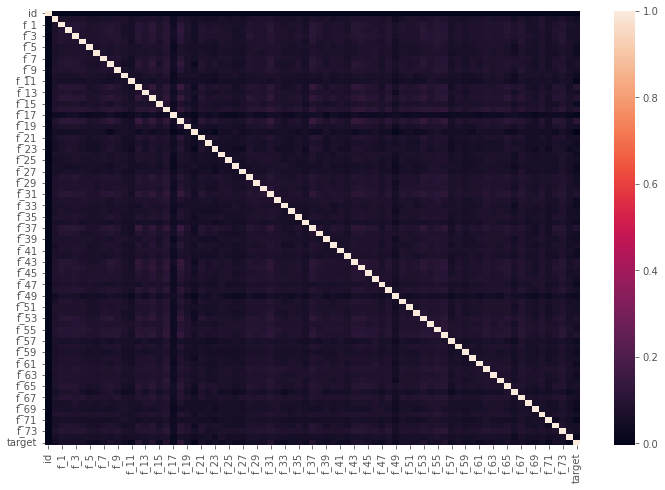

In [190]:
#import seaborn as sns
#import matplotlib.pyplot as plt

fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(train_new.corr(), ax=ax)
plt.show()

In [237]:
abs(train_new.corr()["target"])

id        0.003219
f_0       0.041830
f_1       0.060546
f_2       0.058329
f_3       0.059815
f_4       0.053250
f_5       0.033495
f_6       0.031642
f_7       0.055286
f_8       0.077241
f_9       0.054260
f_10      0.033641
f_11      0.007232
f_12      0.097731
f_13      0.048913
f_14      0.087496
f_15      0.034030
f_16      0.090603
f_17      0.013124
f_18      0.109802
f_19      0.048895
f_20      0.000271
f_21      0.054022
f_22      0.035428
f_23      0.048935
f_24      0.035509
f_25      0.047259
f_26      0.027705
f_27      0.033953
f_28      0.047904
f_29      0.045890
f_30      0.059128
f_31      0.085603
f_32      0.038512
f_33      0.026498
f_34      0.044061
f_35      0.052212
f_36      0.026963
f_37      0.087922
f_38      0.042906
f_39      0.039752
f_40      0.056077
f_41      0.038432
f_42      0.038360
f_43      0.082650
f_44      0.076788
f_45      0.060056
f_46      0.045256
f_47      0.030222
f_48      0.060138
f_49      0.028439
f_50      0.061590
f_51      0.

In [238]:
y_filter = y[0:10000]
X_filter = X[0:10000]
X_filter.head()

,f_0,f_1,f_4,f_6,f_7,f_8,f_10,f_11,f_12,f_13,...,f_57,f_58,f_64,f_66,f_68,f_69,f_70,f_71,f_72,f_74
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0,...,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,16.0,0.0,6.0,2.0,2.0,14.0,1.0,0.0,10.0,1.0,...,0.0,2.0,2.0,0.0,3.0,0.0,0.0,0.0,2.0,1.0
2,0.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,3.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,2.0,0.0,1.5,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,5.0,4.0,0.0,0.0,1.0


Output from cell below

{1: {'feature_idx': (13,),
  'cv_scores': array([-5.99176, -6.41068, -6.27358, -6.69069, -6.19155, -6.1767 ,
         -5.87957, -6.2455 , -6.25425, -5.95361]),
  'avg_score': -6.206788999999999,
  'feature_names': ('f_18',)},
 2: {'feature_idx': (13, 35),
  'cv_scores': array([-6.39845, -6.33629, -6.2558 , -6.02901, -6.31965, -6.3172 ,
         -5.90277, -6.34906, -6.10341, -6.14117]),
  'avg_score': -6.215281,
  'feature_names': ('f_18', 'f_53')},
 3: {'feature_idx': (2, 13, 35),
  'cv_scores': array([-6.11506, -6.54725, -6.17618, -6.49178, -6.27586, -5.94381,
         -5.87005, -6.12941, -6.33926, -6.04496]),
  'avg_score': -6.1933620000000005,
  'feature_names': ('f_4', 'f_18', 'f_53')},
 4: {'feature_idx': (2, 13, 32, 35),
  'cv_scores': array([-6.09662, -6.43563, -6.43891, -6.26391, -6.38344, -6.0504 ,
         -5.86299, -6.03125, -6.12386, -6.16505]),
  'avg_score': -6.185206,
  'feature_names': ('f_4', 'f_18', 'f_48', 'f_53')},
 5: {'feature_idx': (2, 13, 32, 35, 39),
  'cv_scores': array([-6.12811, -6.36687, -6.47138, -6.16811, -6.17534, -6.06161,
         -5.93463, -6.25465, -6.27326, -6.13183]),
  'avg_score': -6.196579,
  'feature_names': ('f_4', 'f_18', 'f_48', 'f_53', 'f_64')},
 6: {'feature_idx': (2, 13, 32, 34, 35, 39),
  'cv_scores': array([-5.96305, -6.40082, -6.65521, -6.21666, -6.07554, -6.01862,
         -5.88827, -6.23174, -6.24087, -6.03222]),
  'avg_score': -6.172300000000001,
  'feature_names': ('f_4', 'f_18', 'f_48', 'f_52', 'f_53', 'f_64')},
 7: {'feature_idx': (2, 8, 13, 32, 34, 35, 39),
  'cv_scores': array([-6.12337, -6.45557, -6.33759, -6.34756, -6.32288, -6.09456,
         -5.84909, -5.96068, -6.12672, -5.98899]),
  'avg_score': -6.1607009999999995,
  'feature_names': ('f_4', 'f_12', 'f_18', 'f_48', 'f_52', 'f_53', 'f_64')},
  
  
 BEST!
  
 8: {'feature_idx': (2, 8, 13, 32, 34, 35, 36, 39),
  'cv_scores': array([-6.28885, -6.28212, -6.18439, -6.29925, -6.15609, -6.08344,
         -5.95946, -5.99505, -6.1067 , -5.98814]),
  'avg_score': -6.134349,
  'feature_names': ('f_4',
   'f_12',
   'f_18',
   'f_48',
   'f_52',
   'f_53',
   'f_56',
   'f_64')},
   
   
   
 9: {'feature_idx': (2, 8, 13, 23, 32, 34, 35, 36, 39),
  'cv_scores': array([-6.21089, -6.2086 , -6.29868, -6.23387, -6.15857, -6.11332,
         -5.96735, -6.0804 , -6.15891, -5.92493]),
  'avg_score': -6.135552000000001,
  'feature_names': ('f_4',
   'f_12',
   'f_18',
   'f_35',
   'f_48',
   'f_52',
   'f_53',
   'f_56',
   'f_64')},
 10: {'feature_idx': (2, 8, 13, 23, 26, 32, 34, 35, 36, 39),
  'cv_scores': array([-6.1887 , -6.11771, -6.41285, -6.19594, -6.16925, -6.15594,
         -5.95812, -6.09298, -6.18382, -5.96698]),
  'avg_score': -6.144228999999999,
  'feature_names': ('f_4',
   'f_12',
   'f_18',
   'f_35',
   'f_38',
   'f_48',
   'f_52',
   'f_53',
   'f_56',
   'f_64')}}

In [193]:
# Feature selectoin using a wrapper. Sequentially adding / removing features. Check performance.
# MAX 10 features..
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(classifier_pipeline, 
           k_features=10, # number of features
           forward=True, # starting from 1
           scoring='neg_mean_squared_error',
           cv=cv)

sfs1.fit(X_filter,y_filter)

sfs1.subsets_

{1: {'feature_idx': (13,),
  'cv_scores': array([-5.99176, -6.41068, -6.27358, -6.69069, -6.19155, -6.1767 ,
         -5.87957, -6.2455 , -6.25425, -5.95361]),
  'avg_score': -6.206788999999999,
  'feature_names': ('f_18',)},
 2: {'feature_idx': (13, 35),
  'cv_scores': array([-6.39845, -6.33629, -6.2558 , -6.02901, -6.31965, -6.3172 ,
         -5.90277, -6.34906, -6.10341, -6.14117]),
  'avg_score': -6.215281,
  'feature_names': ('f_18', 'f_53')},
 3: {'feature_idx': (2, 13, 35),
  'cv_scores': array([-6.11506, -6.54725, -6.17618, -6.49178, -6.27586, -5.94381,
         -5.87005, -6.12941, -6.33926, -6.04496]),
  'avg_score': -6.1933620000000005,
  'feature_names': ('f_4', 'f_18', 'f_53')},
 4: {'feature_idx': (2, 13, 32, 35),
  'cv_scores': array([-6.09662, -6.43563, -6.43891, -6.26391, -6.38344, -6.0504 ,
         -5.86299, -6.03125, -6.12386, -6.16505]),
  'avg_score': -6.185206,
  'feature_names': ('f_4', 'f_18', 'f_48', 'f_53')},
 5: {'feature_idx': (2, 13, 32, 35, 39),
  'cv_scor

In [202]:
X_filter2 = X_filter[['f_4',
   'f_12',
   'f_18',
   'f_48',
   'f_52',
   'f_53',
   'f_56',
   'f_64',]]

# y_filter = y_filter
y_pred = cross_val_predict(classifier_pipeline, X_filter2, y_filter, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y_filter,y_pred)),3)))
print("R_squared: " + str(round(r2_score(y_filter,y_pred),3)))

# Initial

#RMSE: 2.53
#R_squared: -0.04

# New
# RMSE: 2.477
# R_squared: 0.001

RMSE: 2.477
R_squared: 0.001


In [239]:
# Check correlation between independent variables. add a feature where you put them together?

train_new[['f_4',
   'f_12',
   'f_18',
   'f_48',
   'f_52',
   'f_53',
   'f_56',
   'f_64', 'target']].corr()

# create new variable f_18 * f_12

,f_4,f_12,f_18,f_48,f_52,f_53,f_56,f_64,target
f_4,1.000000,0.092445,0.101859,0.089218,0.080016,0.087778,0.089918,0.080918,0.053250
f_12,0.092445,1.000000,0.141126,0.100952,0.088464,0.109544,0.109072,0.087126,0.097731
f_18,0.101859,0.141126,1.000000,0.110754,0.098662,0.128700,0.126230,0.090074,0.109802
f_48,0.089218,0.100952,0.110754,1.000000,0.083465,0.092715,0.100403,0.082118,0.060138
f_52,0.080016,0.088464,0.098662,0.083465,1.000000,0.097415,0.090216,0.069835,0.061391
f_53,0.087778,0.109544,0.128700,0.092715,0.097415,1.000000,0.106405,0.085529,0.082701
f_56,0.089918,0.109072,0.126230,0.100403,0.090216,0.106405,1.000000,0.095035,0.084611
f_64,0.080918,0.087126,0.090074,0.082118,0.069835,0.085529,0.095035,1.000000,0.049408
target,0.053250,0.097731,0.109802,0.060138,0.061391,0.082701,0.084611,0.049408,1.000000


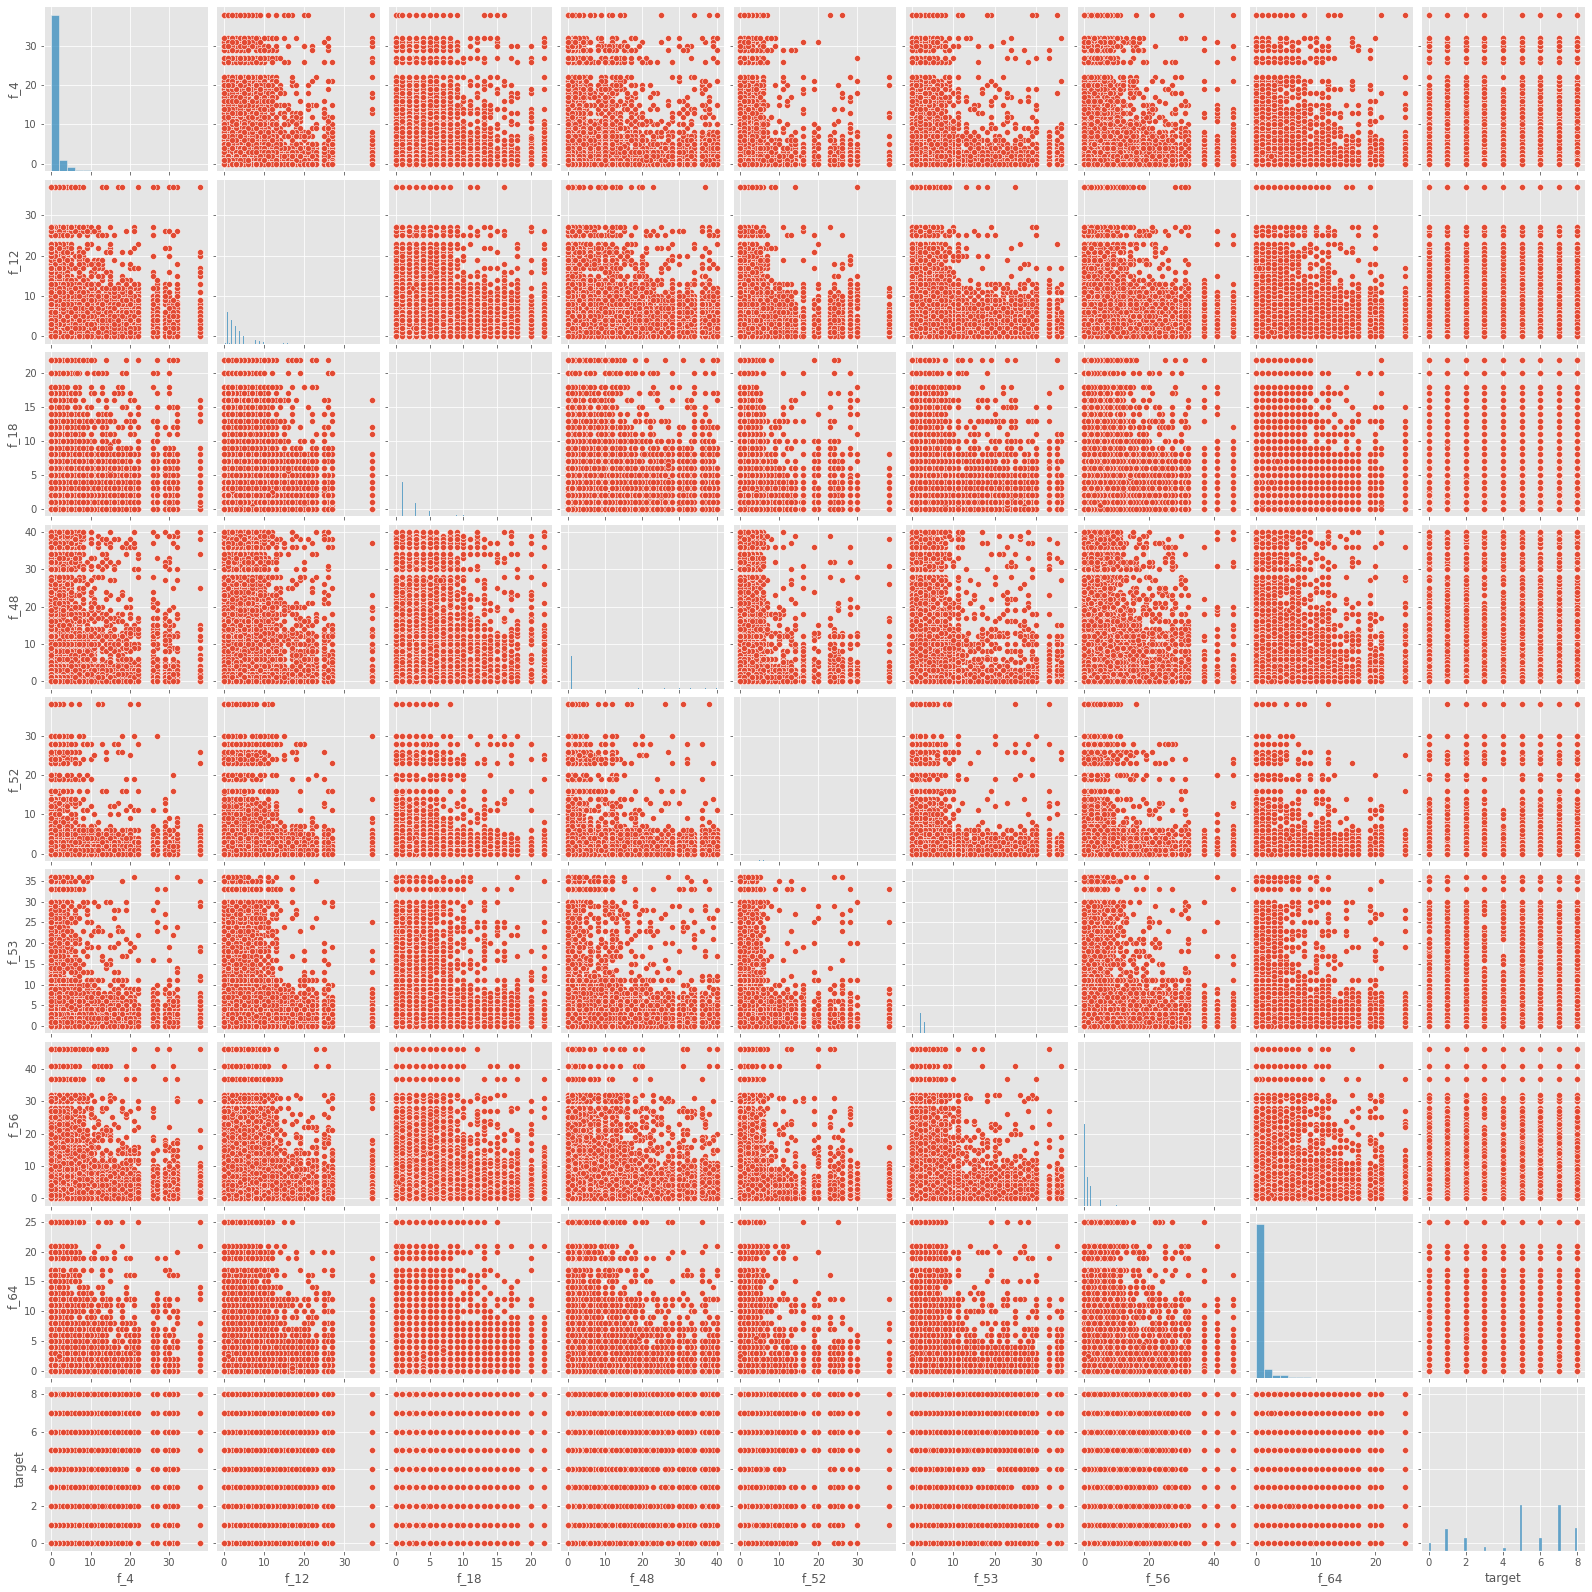

In [220]:
sns.pairplot(train_new[['f_4',
   'f_12',
   'f_18',
   'f_48',
   'f_52',
   'f_53',
   'f_56',
   'f_64', 'target']])

# Patterns

# MAX problems: F_4, F12, F_18 x 2, F_52, F_56, F_64

In [271]:
# Remove MAX problems: 'f_4', 'f_12', 'f_18', 'f_52', 'f_56', 'f_64'
# IM SURE THERE IS A SMARTER WAY... SYNTAX ISSUES.
train_new = train_new.drop(train_new[train_new['f_4']==train_new['f_4'].max()].index.tolist())
train_new = train_new.drop(train_new[train_new['f_12']==train_new['f_12'].max()].index.tolist())
train_new = train_new.drop(train_new[train_new['f_18']==train_new['f_18'].max()].index.tolist())
train_new = train_new.drop(train_new[train_new['f_52']==train_new['f_52'].max()].index.tolist())
train_new = train_new.drop(train_new[train_new['f_56']==train_new['f_56'].max()].index.tolist())
train_new = train_new.drop(train_new[train_new['f_64']==train_new['f_64'].max()].index.tolist())

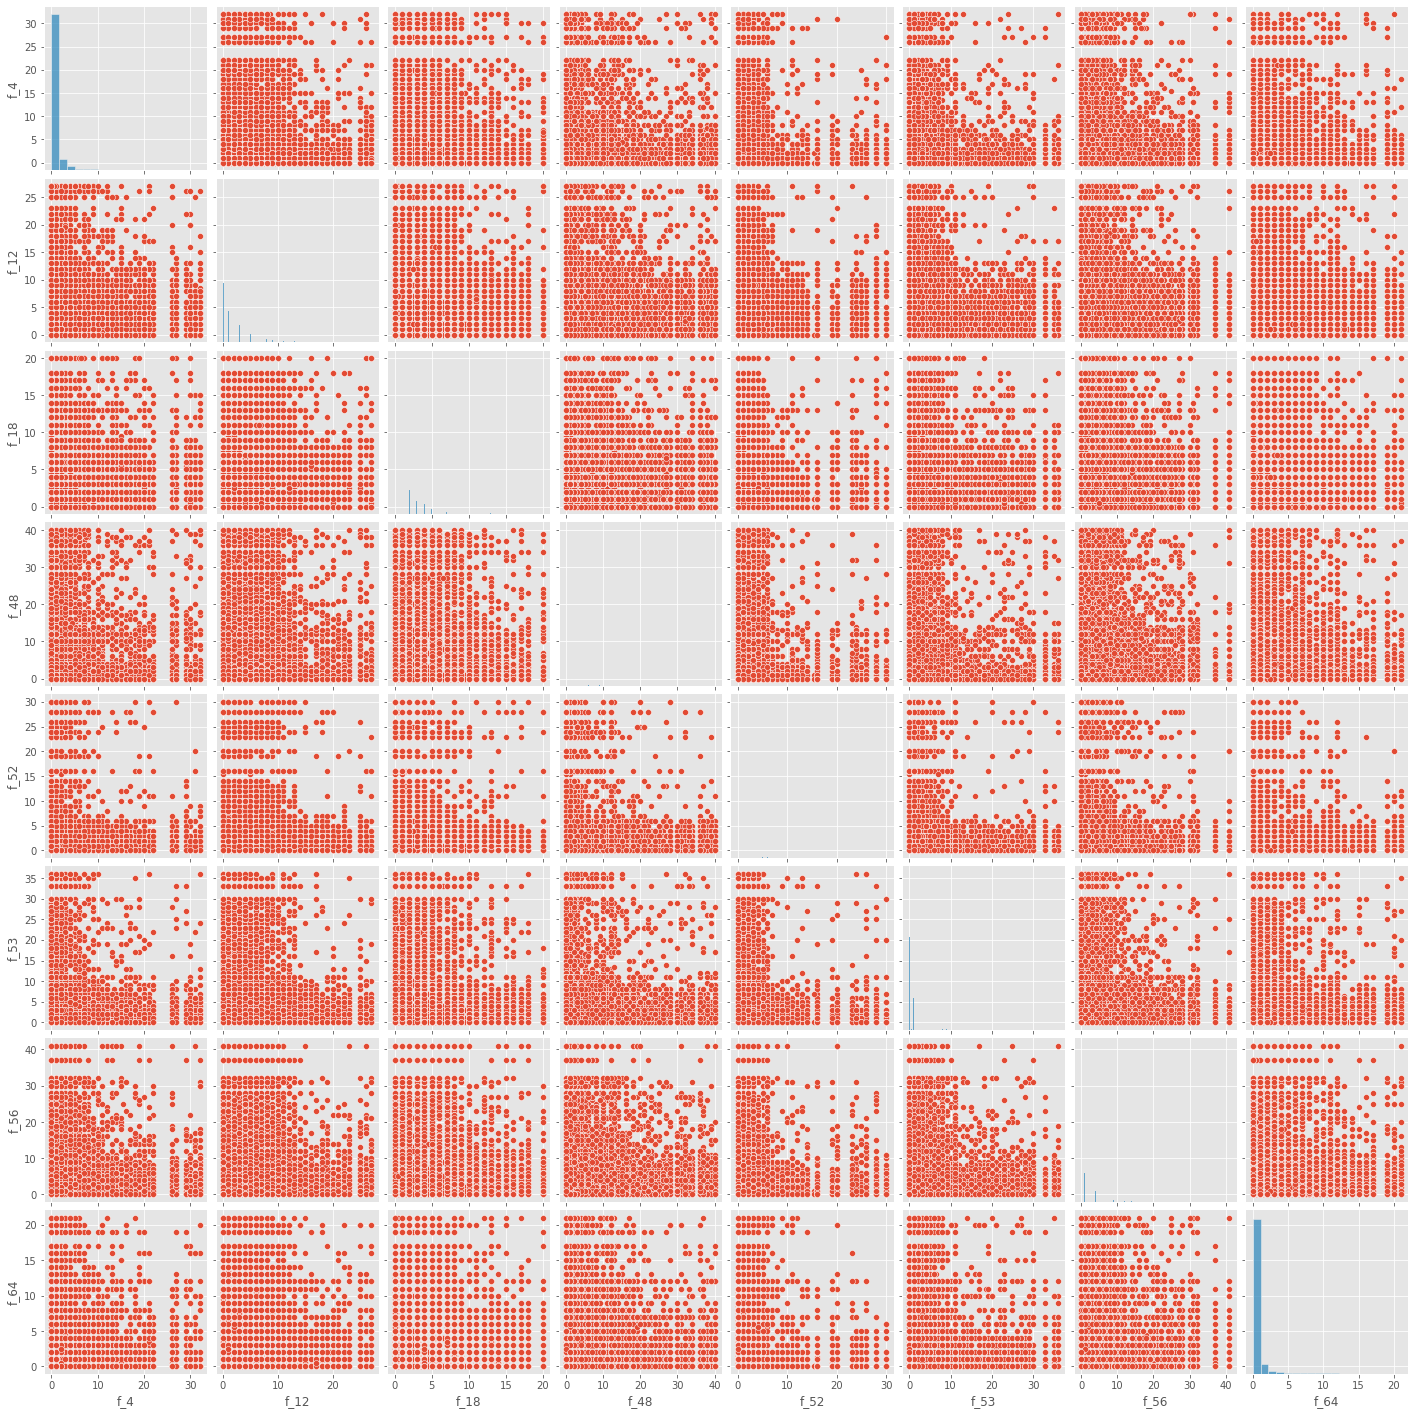

In [243]:
sns.pairplot(train_new[['f_4',
   'f_12',
   'f_18',
   'f_48',
   'f_52',
   'f_53',
   'f_56',
   'f_64']])

In [272]:
# Check correlation between independent variables. add a feature where you put them together?

train_new[['f_4',
   'f_12',
   'f_18',
   'f_48',
   'f_52',
   'f_53',
   'f_56',
   'f_64', 'target']].corr()

# create new variable f_18 * f_12

,f_4,f_12,f_18,f_48,f_52,f_53,f_56,f_64,target
f_4,1.000000,0.092271,0.103955,0.090295,0.082728,0.087333,0.093434,0.082698,0.055221
f_12,0.092271,1.000000,0.146926,0.103207,0.094421,0.112757,0.114313,0.086991,0.101673
f_18,0.103955,0.146926,1.000000,0.109687,0.103957,0.129172,0.130354,0.092004,0.112034
f_48,0.090295,0.103207,0.109687,1.000000,0.084794,0.091907,0.099737,0.082079,0.060146
f_52,0.082728,0.094421,0.103957,0.084794,1.000000,0.097846,0.093710,0.074070,0.063825
f_53,0.087333,0.112757,0.129172,0.091907,0.097846,1.000000,0.109526,0.085972,0.083085
f_56,0.093434,0.114313,0.130354,0.099737,0.093710,0.109526,1.000000,0.098248,0.087771
f_64,0.082698,0.086991,0.092004,0.082079,0.074070,0.085972,0.098248,1.000000,0.049754
target,0.055221,0.101673,0.112034,0.060146,0.063825,0.083085,0.087771,0.049754,1.000000


In [286]:
#New dataset for training
X = train_new[['f_4',
   'f_12',
   'f_18',
   'f_48',
   'f_52',
   'f_53',
   'f_56',
   'f_64']]
y =  train_new['target']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149276 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   f_4     149276 non-null  float64
 1   f_12    149276 non-null  float64
 2   f_18    149276 non-null  float64
 3   f_48    149276 non-null  float64
 4   f_52    149276 non-null  float64
 5   f_53    149276 non-null  float64
 6   f_56    149276 non-null  float64
 7   f_64    149276 non-null  float64
dtypes: float64(8)
memory usage: 10.2 MB


In [287]:
# Split train.csv into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
print("set is split")

set is split


In [288]:
# trengs dette steget?
from sklearn.impute import SimpleImputer

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

#imp = SimpleImputer()

X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)
print("done")

done


In [249]:
#Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_std, y_train)

rf_clf_y_train_pred = rf_clf.predict(X_train_std) #predict on train set
rf_clf_y_test_pred = rf_clf.predict(X_test_std) # predict on test set

print("Train accuracy: ", metrics.accuracy_score(y_train, rf_clf_y_train_pred))
print("Test accuracy: ", metrics.accuracy_score(y_test, rf_clf_y_test_pred))

# All features normalized
# Train accuracy:  1.0
# Test accuracy:  0.3516533333333333
# OVERFITTING

Train accuracy:  0.9968177777777778
Test accuracy:  0.34048


In [250]:
#Logistic regression
lr = LogisticRegression()
lr.fit(X_train_std,y_train)

lr_y_train_pred = lr.predict(X_train_std) #predict on train set
lr_y_test_pred = lr.predict(X_test_std) # predict on test set

print("Train accuracy: ", metrics.accuracy_score(y_train, lr_y_train_pred))
print("Test accuracy: ", metrics.accuracy_score(y_test, lr_y_test_pred))
lr_y_test_pred[:10]

Train accuracy:  0.33916444444444444
Test accuracy:  0.3386133333333333


array([1, 7, 1, 1, 7, 7, 5, 7, 7, 5], dtype=int64)

In [289]:
# Neural network

clf = MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(8,8,), max_iter=5000)
clf.fit(X_train_std, y_train)

clf_y_train_pred = clf.predict(X_train_std) #predict on train set
clf_y_test_pred = clf.predict(X_test_std) # predict on test set

print("Train accuracy: ", metrics.accuracy_score(y_train, clf_y_train_pred))
print("Test accuracy: ", metrics.accuracy_score(y_test, clf_y_test_pred))

#32.8

Train accuracy:  0.3279741329260341
Test accuracy:  0.3227310485275597


array([[2., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 2.],
       ...,
       [0., 1., 0., ..., 2., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [257]:
test_new = test[['f_4',
   'f_12',
   'f_18',
   'f_48',
   'f_52',
   'f_53',
   'f_56',
   'f_64']]
test_new_std = std.fit_transform(test_new)

#imp = SimpleImputer()

test_new_std_imp = imp.fit_transform(test_new_std)
print("done")

test_new_std_imp

,f_4,f_12,f_18,f_48,f_52,f_53,f_56,f_64
0,0,0,2,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,4,10,0,4,0,0
3,2,0,1,3,2,0,0,2
4,0,0,0,0,0,0,0,0


In [258]:
# submission
target = rf_clf.predict(test_new_std)
target

ValueError: X has 8 features, but DecisionTreeClassifier is expecting 47 features as input.

In [ ]:
submission = pd.DataFrame({'id': test['id'], 'target': target})

In [ ]:
submission.to_csv('last_submission.csv', index=False)